In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("../datasets/economic_profile_raw.csv")
raw_data = raw_data.dropna(how="all")

C:\Users\fansh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Extract data entries for 2019 data. Clean out useless rows, transfer GeoFIPS to standard string

In [48]:
df_data = raw_data[["GeoFIPS", "GeoName", "Description", "Unit", "2018"]]
df_data = df_data[df_data["GeoFIPS"].str.len() == 8]
df_data["GeoFIPS"] = df_data["GeoFIPS"].apply(lambda x: x[2:-1])
df_data.head()

,GeoFIPS,GeoName,Description,Unit,2018
0,00000,United States,Personal income (thousands of dollars),Thousands of dollars,17839255000
1,00000,United States,Net earnings by place of residence,Thousands of dollars,11167886000
2,00000,United States,Personal current transfer receipts,Thousands of dollars,2970254000
3,00000,United States,Income maintenance benefits 1/,Thousands of dollars,260380000
4,00000,United States,Unemployment insurance compensation,Thousands of dollars,28302000


Split the whole data set into country level, state level and county level dataframes

In [49]:
df_country = df_data[df_data["GeoFIPS"] == "00000"]
df_state = df_data[(df_data["GeoFIPS"] != "00000") & (df_data["GeoFIPS"].str.endswith("000"))]
df_county = df_data[~df_data["GeoFIPS"].str.endswith("000")]

In [50]:
df_country["Description"].unique()

array(['Personal income (thousands of dollars)',
       ' Net earnings by place of residence',
       ' Personal current transfer receipts',
       '  Income maintenance benefits 1/',
       '  Unemployment insurance compensation', '  Retirement and other',
       ' Dividends, interest, and rent 2/', ' Population (persons) 3/',
       ' Per capita personal income 4/', ' Per capita net earnings 4/',
       ' Per capita personal current transfer receipts 4/',
       '  Per capita income maintenance benefits 4/',
       '  Per capita unemployment insurance compensation 4/',
       '  Per capita retirement and other 4/',
       ' Per capita dividends, interest, and rent 4/',
       ' Earnings by place of work', '  Wages and salaries',
       '  Supplements to wages and salaries',
       '   Employer contributions for employee pension and insurance funds 5/',
       '   Employer contributions for government social insurance',
       "  Proprietors' income", "   Farm proprietors' income",
  

In [57]:
def extract_feature(full_df, feature_name):
    df = full_df[(full_df["Description"] == feature_name) & (full_df["2018"] != '(NA)')]
    df = df[["GeoFIPS", "GeoName", "Unit", "2018"]]
    df["2018"] = df["2018"].astype(int)
    return df

In [58]:
county_income_df = extract_feature(df_county, " Per capita personal income 4/")
county_employments_df = extract_feature(df_county, "Total employment (number of jobs)")
county_salary_df = extract_feature(df_county, " Average wages and salaries")

In [63]:
def plot_tops(df, name):
    top_entries = df.sort_values(by="2018", ascending = False).head(10)
    plt.figure(figsize=(12,4))
    sns.barplot(data = top_entries, y = "GeoName", x = "2018", orient = 'h').set(
        xlabel = df.iloc[0]["Unit"],
        ylabel = "County",
        title = "Top 10 counties with {}".format(name)
)

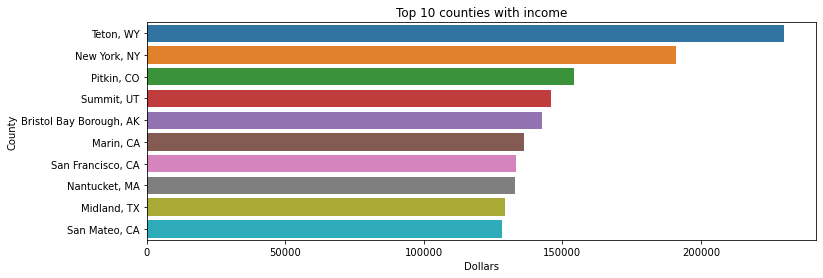

In [64]:
plot_tops(county_income_df, "income")

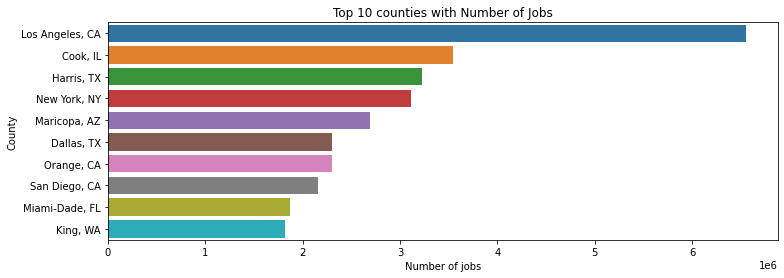

In [65]:
plot_tops(county_employments_df, "Number of Jobs")

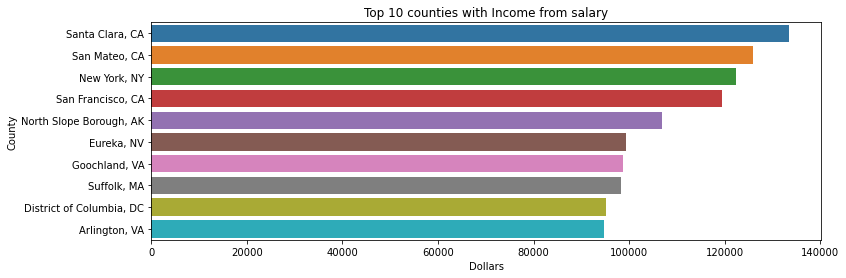

In [66]:
plot_tops(county_salary_df, "Income from salary")